In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Longitudinal

In [93]:
longIHC_metadata = pd.read_csv('../data/longIHC/Microbiome/longIHC_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample_name', 'mouse_number', 'exposure_type', 'host_age'], index_col=0)
longIHC_metadata.head()

,exposure_type,host_age,mouse_number
sample_name,,,
11548.A15.85.1,Air,10.0,85.0
11548.A15.85.10,Air,14.5,85.0
11548.A15.85.10.b,Air,14.5,85.0
11548.A15.85.11,Air,15.0,85.0
11548.A15.85.11.b,Air,15.0,85.0


In [94]:
longIHC_wUF_dm = pd.read_csv('../data/longIHC/Microbiome/longIHC-wUF-distance-matrix.tsv', sep='\t', index_col=0)
longIHC_wUF_dm.head()

,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,11548.A19.102.teeth,11548.A18.98.6,11548.A23.120.17,...,11548.A23.119.17,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4
11548.A19.103.10,0.000000,0.270711,0.777381,0.120938,0.086537,0.900074,0.688085,0.842311,0.675252,0.472511,...,0.644209,0.546071,0.688956,0.401571,0.305652,0.654566,0.553863,0.195562,0.446492,0.557489
11548.A19.102.16,0.270711,0.000000,0.558366,0.265806,0.327251,0.672071,0.451432,0.677917,0.431661,0.270789,...,0.397334,0.319116,0.454846,0.207614,0.177700,0.441900,0.337530,0.193479,0.237006,0.357540
11548.A21.110.9,0.777381,0.558366,0.000000,0.768812,0.831311,0.620398,0.283477,0.608132,0.317785,0.438733,...,0.324966,0.393430,0.246453,0.422464,0.564790,0.294154,0.347496,0.694783,0.468646,0.382917
11548.A18.97.19,0.120938,0.265806,0.768812,0.000000,0.106298,0.898543,0.665501,0.814036,0.649374,0.456790,...,0.612262,0.541770,0.661575,0.397738,0.313036,0.644073,0.543965,0.159363,0.414408,0.562447
11548.A18.98.10,0.086537,0.327251,0.831311,0.106298,0.000000,0.950635,0.715770,0.873716,0.711891,0.516880,...,0.673657,0.594634,0.723150,0.441615,0.369732,0.684904,0.582543,0.203766,0.484126,0.601428


In [95]:
named_longIHC_wUF_dm = pd.merge(longIHC_metadata, longIHC_wUF_dm, left_index=True, right_index=True)
named_longIHC_wUF_dm.head()

,exposure_type,host_age,mouse_number,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,...,11548.A23.119.17,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4
11548.A18.100.1,IHC,10.0,100.0,0.930823,0.713872,0.696131,0.929423,0.981533,0.130242,0.527697,...,0.592071,0.528944,0.592230,0.626607,0.793629,0.596738,0.614415,0.831317,0.727477,0.527953
11548.A18.100.10,IHC,14.5,100.0,0.348658,0.289453,0.562941,0.350007,0.380792,0.759813,0.456558,...,0.403792,0.394737,0.451752,0.331118,0.149770,0.432356,0.349023,0.454023,0.179628,0.426739
11548.A18.100.11,IHC,15.0,100.0,0.552467,0.312554,0.357301,0.525504,0.574785,0.511423,0.227300,...,0.184424,0.152964,0.257893,0.217971,0.305802,0.200109,0.147616,0.466483,0.220048,0.164020
11548.A18.100.12,IHC,15.5,100.0,0.610673,0.359905,0.336897,0.584311,0.635806,0.536041,0.203829,...,0.142881,0.262142,0.206289,0.337302,0.327993,0.167681,0.127938,0.522232,0.213049,0.281086
11548.A18.100.13,IHC,16.0,100.0,0.588990,0.343859,0.409169,0.558546,0.615758,0.410275,0.237488,...,0.262292,0.126123,0.319317,0.250070,0.400081,0.278852,0.229552,0.496099,0.309107,0.122442


In [96]:
named_longIHC_wUF_dm['combined'] = named_longIHC_wUF_dm['mouse_number'].map(str) + '_' + named_longIHC_wUF_dm['exposure_type'].map(str) + "_" + named_longIHC_wUF_dm['host_age'].map(str)
named_longIHC_wUF_dm.head()

,exposure_type,host_age,mouse_number,11548.A19.103.10,11548.A19.102.16,11548.A21.110.9,11548.A18.97.19,11548.A18.98.10,11548.A18.99.1,11548.A22.115.9,...,11548.A22.114.3,11548.A23.118.11,11548.A23.117.3,11548.A19.104.6,11548.A22.115.4,11548.A19.101.11,11548.A18.97.14,11548.A18.100.17,11548.A21.110.4,combined
11548.A18.100.1,IHC,10.0,100.0,0.930823,0.713872,0.696131,0.929423,0.981533,0.130242,0.527697,...,0.528944,0.592230,0.626607,0.793629,0.596738,0.614415,0.831317,0.727477,0.527953,100.0_IHC_10.0
11548.A18.100.10,IHC,14.5,100.0,0.348658,0.289453,0.562941,0.350007,0.380792,0.759813,0.456558,...,0.394737,0.451752,0.331118,0.149770,0.432356,0.349023,0.454023,0.179628,0.426739,100.0_IHC_14.5
11548.A18.100.11,IHC,15.0,100.0,0.552467,0.312554,0.357301,0.525504,0.574785,0.511423,0.227300,...,0.152964,0.257893,0.217971,0.305802,0.200109,0.147616,0.466483,0.220048,0.164020,100.0_IHC_15.0
11548.A18.100.12,IHC,15.5,100.0,0.610673,0.359905,0.336897,0.584311,0.635806,0.536041,0.203829,...,0.262142,0.206289,0.337302,0.327993,0.167681,0.127938,0.522232,0.213049,0.281086,100.0_IHC_15.5
11548.A18.100.13,IHC,16.0,100.0,0.588990,0.343859,0.409169,0.558546,0.615758,0.410275,0.237488,...,0.126123,0.319317,0.250070,0.400081,0.278852,0.229552,0.496099,0.309107,0.122442,100.0_IHC_16.0


In [97]:
named_longIHC_wUF_dm.drop(columns=['host_age', 'exposure_type', 'mouse_number'], inplace=True)

In [98]:
named2_longIHC_wUF_dm = named_longIHC_wUF_dm.set_index('combined')

In [99]:
Named_longIHC_wUF_dm = named_longIHC_wUF_dm[['combined']].copy()
Named_longIHC_wUF_dm.head()

,combined
11548.A18.100.1,100.0_IHC_10.0
11548.A18.100.10,100.0_IHC_14.5
11548.A18.100.11,100.0_IHC_15.0
11548.A18.100.12,100.0_IHC_15.5
11548.A18.100.13,100.0_IHC_16.0


In [100]:
named3_longIHC_wUF_dm = pd.merge(named2_longIHC_wUF_dm.T, Named_longIHC_wUF_dm, left_index=True, right_index=True)
named4_longIHC_wUF_dm = named3_longIHC_wUF_dm.set_index('combined')
named4_longIHC_wUF_dm

,100.0_IHC_10.0,100.0_IHC_14.5,100.0_IHC_15.0,100.0_IHC_15.5,100.0_IHC_16.0,100.0_IHC_16.5,100.0_IHC_17.0,100.0_IHC_17.5,100.0_IHC_18.0,100.0_IHC_18.5,...,120.0_Air_19.0,120.0_Air_10.5,120.0_Air_19.5,120.0_Air_11.0,120.0_Air_11.5,120.0_Air_12.0,120.0_Air_12.5,120.0_Air_13.0,120.0_Air_13.5,120.0_Air_14.0
combined,,,,,,,,,,,,,,,,,,,,,
103.0_IHC_14.5,0.930823,0.348658,0.552467,0.610673,0.588990,0.327546,0.561276,0.385915,0.446492,0.102248,...,0.663667,0.671278,0.681760,0.411675,0.578716,0.674146,0.548515,0.645411,0.665272,0.718651
102.0_IHC_17.5,0.713872,0.289453,0.312554,0.359905,0.343859,0.208759,0.311377,0.204948,0.237006,0.209871,...,0.426526,0.428552,0.445923,0.202173,0.363408,0.448841,0.336007,0.501249,0.475012,0.487450
110.0_Air_14.0,0.696131,0.562941,0.357301,0.336897,0.409169,0.580315,0.382518,0.514255,0.468646,0.731446,...,0.291469,0.281954,0.321798,0.456150,0.298330,0.313574,0.323459,0.445971,0.340373,0.317260
97.0_IHC_19.0,0.929423,0.350007,0.525504,0.584311,0.558546,0.288546,0.526989,0.376746,0.414408,0.078785,...,0.632804,0.669724,0.632973,0.397010,0.559782,0.650965,0.537190,0.642511,0.631139,0.704476
98.0_IHC_14.5,0.981533,0.380792,0.574785,0.635806,0.615758,0.348563,0.589776,0.446598,0.484126,0.144691,...,0.703932,0.727910,0.698087,0.454608,0.608606,0.692438,0.578011,0.696214,0.681460,0.760133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115.0_Air_11.5,0.596738,0.432356,0.200109,0.167681,0.278852,0.429353,0.258301,0.381577,0.327734,0.608196,...,0.143996,0.195311,0.179399,0.302816,0.149049,0.149710,0.151947,0.352272,0.239006,0.186745
101.0_IHC_15.0,0.614415,0.349023,0.147616,0.127938,0.229552,0.333618,0.202369,0.298271,0.248322,0.510345,...,0.204618,0.231704,0.228369,0.227712,0.127763,0.178556,0.107506,0.352380,0.268376,0.257778
97.0_IHC_16.5,0.831317,0.454023,0.466483,0.522232,0.496099,0.369059,0.460046,0.374999,0.405216,0.171810,...,0.572720,0.584852,0.586559,0.368545,0.508870,0.601374,0.485975,0.673053,0.637923,0.633452


In [101]:
named5_longIHC_wUF_dm = named4_longIHC_wUF_dm.filter(regex='IHC')
named6_longIHC_wUF_dm = named5_longIHC_wUF_dm.T.filter(regex='Air')
named6_longIHC_wUF_dm.shape

(228, 231)

In [102]:
l_wufdm = named6_longIHC_wUF_dm.copy()
l_wufdm2 = l_wufdm.stack().reset_index()
l_wufdm2.columns = ['IHC','Air','Value']
l_wufdm2

,IHC,Air,Value
0,100.0_IHC_10.0,110.0_Air_14.0,0.696131
1,100.0_IHC_10.0,115.0_Air_14.0,0.527697
2,100.0_IHC_10.0,120.0_Air_18.0,0.732306
3,100.0_IHC_10.0,116.0_Air_13.0,0.709209
4,100.0_IHC_10.0,115.0_Air_19.0,0.546212
...,...,...,...
52663,108.0_IHC_20.0,114.0_Air_11.0,0.792111
52664,108.0_IHC_20.0,118.0_Air_15.0,0.769607
52665,108.0_IHC_20.0,117.0_Air_11.0,0.780160
52666,108.0_IHC_20.0,115.0_Air_11.5,0.755192


In [103]:
l_wufdm2['timepoints'] = l_wufdm2['IHC'].str.split('_').str[-1] + "_" + l_wufdm2['Air'].str.split('_').str[-1]
l_wufdm2.timepoints.unique()

array(['10.0_14.0', '10.0_18.0', '10.0_13.0', '10.0_19.0', '10.0_16.0',
       '10.0_17.0', '10.0_15.5', '10.0_16.5', '10.0_18.5', '10.0_19.5',
       '10.0_14.5', '10.0_17.5', '10.0_15.0', '10.0_13.5', '10.0_11.0',
       '10.0_12.5', '10.0_10.0', '10.0_11.5', '10.0_12.0', '10.0_10.5',
       '14.5_14.0', '14.5_18.0', '14.5_13.0', '14.5_19.0', '14.5_16.0',
       '14.5_17.0', '14.5_15.5', '14.5_16.5', '14.5_18.5', '14.5_19.5',
       '14.5_14.5', '14.5_17.5', '14.5_15.0', '14.5_13.5', '14.5_11.0',
       '14.5_12.5', '14.5_10.0', '14.5_11.5', '14.5_12.0', '14.5_10.5',
       '15.0_14.0', '15.0_18.0', '15.0_13.0', '15.0_19.0', '15.0_16.0',
       '15.0_17.0', '15.0_15.5', '15.0_16.5', '15.0_18.5', '15.0_19.5',
       '15.0_14.5', '15.0_17.5', '15.0_15.0', '15.0_13.5', '15.0_11.0',
       '15.0_12.5', '15.0_10.0', '15.0_11.5', '15.0_12.0', '15.0_10.5',
       '15.5_14.0', '15.5_18.0', '15.5_13.0', '15.5_19.0', '15.5_16.0',
       '15.5_17.0', '15.5_15.5', '15.5_16.5', '15.5_18.5', '15.5

In [104]:
l_wufdm2["IHC_timepoint"] = l_wufdm2.IHC.str.split('_').str[-1]
l_wufdm2["Air_timepoint"] = l_wufdm2.Air.str.split('_').str[-1]
l_wufdm3 = l_wufdm2[l_wufdm2.IHC_timepoint == l_wufdm2.Air_timepoint].copy()
l_wufdm3

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint
48,100.0_IHC_10.0,119.0_Air_10.0,0.330879,10.0_10.0,10.0,10.0
55,100.0_IHC_10.0,118.0_Air_10.0,0.126741,10.0_10.0,10.0,10.0
62,100.0_IHC_10.0,114.0_Air_10.0,0.328793,10.0_10.0,10.0,10.0
64,100.0_IHC_10.0,117.0_Air_10.0,0.204050,10.0_10.0,10.0,10.0
65,100.0_IHC_10.0,111.0_Air_10.0,0.283669,10.0_10.0,10.0,10.0
...,...,...,...,...,...,...
52234,108.0_IHC_14.0,116.0_Air_14.0,0.401307,14.0_14.0,14.0,14.0
52252,108.0_IHC_14.0,113.0_Air_14.0,0.296466,14.0_14.0,14.0,14.0
52315,108.0_IHC_14.0,118.0_Air_14.0,0.424750,14.0_14.0,14.0,14.0
52322,108.0_IHC_14.0,119.0_Air_14.0,0.363466,14.0_14.0,14.0,14.0


In [105]:
l_wufdm3['mice'] = l_wufdm3['IHC'].str.split('_').str[0] + "_" + l_wufdm3['Air'].str.split('_').str[0]
l_wufdm3.mice.unique()

array(['100.0_119.0', '100.0_118.0', '100.0_114.0', '100.0_117.0',
       '100.0_111.0', '100.0_115.0', '100.0_110.0', '100.0_116.0',
       '100.0_109.0', '100.0_112.0', '100.0_113.0', '100.0_120.0',
       '97.0_119.0', '97.0_118.0', '97.0_114.0', '97.0_117.0',
       '97.0_111.0', '97.0_115.0', '97.0_110.0', '97.0_116.0',
       '97.0_109.0', '97.0_112.0', '97.0_113.0', '97.0_120.0',
       '98.0_119.0', '98.0_118.0', '98.0_114.0', '98.0_117.0',
       '98.0_111.0', '98.0_115.0', '98.0_110.0', '98.0_116.0',
       '98.0_109.0', '98.0_112.0', '98.0_113.0', '98.0_120.0',
       '99.0_119.0', '99.0_118.0', '99.0_114.0', '99.0_117.0',
       '99.0_111.0', '99.0_115.0', '99.0_110.0', '99.0_116.0',
       '99.0_109.0', '99.0_112.0', '99.0_113.0', '99.0_120.0',
       '101.0_119.0', '101.0_118.0', '101.0_114.0', '101.0_117.0',
       '101.0_111.0', '101.0_115.0', '101.0_110.0', '101.0_116.0',
       '101.0_109.0', '101.0_112.0', '101.0_113.0', '101.0_120.0',
       '102.0_119.0', '102.0_11

In [106]:
longcombos = list(l_wufdm3.mice.unique())

In [107]:
l_wufdm4 = l_wufdm3.copy()
l_wufdm4['host_age'] = l_wufdm4['timepoints'].str.split('_').str[-1]
l_wufdm4['Controls'] = l_wufdm4['Air'].str.split('_').str[0]
l_wufdm4['Experimentals'] = l_wufdm4['IHC'].str.split('_').str[0]
l_wufdm4

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint,mice,host_age,Controls,Experimentals
48,100.0_IHC_10.0,119.0_Air_10.0,0.330879,10.0_10.0,10.0,10.0,100.0_119.0,10.0,119.0,100.0
55,100.0_IHC_10.0,118.0_Air_10.0,0.126741,10.0_10.0,10.0,10.0,100.0_118.0,10.0,118.0,100.0
62,100.0_IHC_10.0,114.0_Air_10.0,0.328793,10.0_10.0,10.0,10.0,100.0_114.0,10.0,114.0,100.0
64,100.0_IHC_10.0,117.0_Air_10.0,0.204050,10.0_10.0,10.0,10.0,100.0_117.0,10.0,117.0,100.0
65,100.0_IHC_10.0,111.0_Air_10.0,0.283669,10.0_10.0,10.0,10.0,100.0_111.0,10.0,111.0,100.0
...,...,...,...,...,...,...,...,...,...,...
52234,108.0_IHC_14.0,116.0_Air_14.0,0.401307,14.0_14.0,14.0,14.0,108.0_116.0,14.0,116.0,108.0
52252,108.0_IHC_14.0,113.0_Air_14.0,0.296466,14.0_14.0,14.0,14.0,108.0_113.0,14.0,113.0,108.0
52315,108.0_IHC_14.0,118.0_Air_14.0,0.424750,14.0_14.0,14.0,14.0,108.0_118.0,14.0,118.0,108.0
52322,108.0_IHC_14.0,119.0_Air_14.0,0.363466,14.0_14.0,14.0,14.0,108.0_119.0,14.0,119.0,108.0


In [108]:
l_wufdm4.Value.mean()

0.35728258338099783

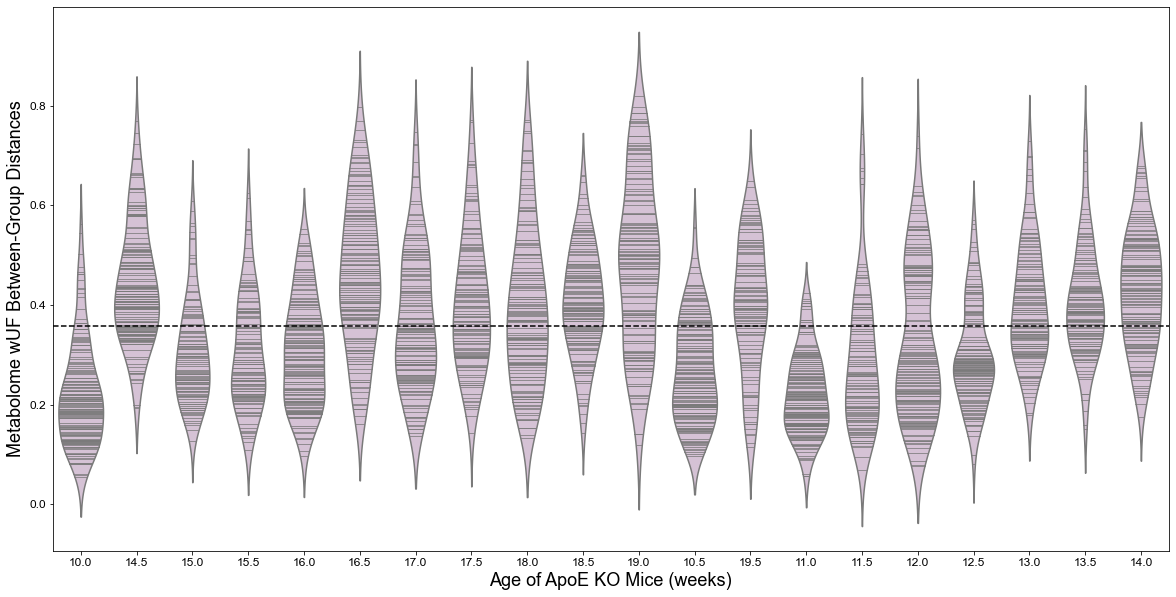

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="host_age", y="Value", data=l_wufdm4,
                    palette=["thistle"], split=True, scale="count", inner="stick", 
                    scale_hue=True, bw='scott')
    
plt.ylabel('Metabolome wUF Between-Group Distances', size=18)
plt.xlabel('Age of ApoE KO Mice (weeks)', size=18)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.35728258338099783, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/longIHC_metab_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")

In [119]:
some_values = ['10.0']
l_wufdm5 = l_wufdm4.loc[~l_wufdm4['host_age'].isin(some_values)]
l_wufdm5.head()

,IHC,Air,Value,timepoints,IHC_timepoint,Air_timepoint,mice,host_age,Controls,Experimentals
245,100.0_IHC_14.5,120.0_Air_14.5,0.354709,14.5_14.5,14.5,14.5,100.0_120.0,14.5,120.0,100.0
253,100.0_IHC_14.5,115.0_Air_14.5,0.267013,14.5_14.5,14.5,14.5,100.0_115.0,14.5,115.0,100.0
278,100.0_IHC_14.5,112.0_Air_14.5,0.479958,14.5_14.5,14.5,14.5,100.0_112.0,14.5,112.0,100.0
298,100.0_IHC_14.5,114.0_Air_14.5,0.426863,14.5_14.5,14.5,14.5,100.0_114.0,14.5,114.0,100.0
333,100.0_IHC_14.5,113.0_Air_14.5,0.416844,14.5_14.5,14.5,14.5,100.0_113.0,14.5,113.0,100.0


In [127]:
l_wufdm5.Value.mean()

0.3652171642311718

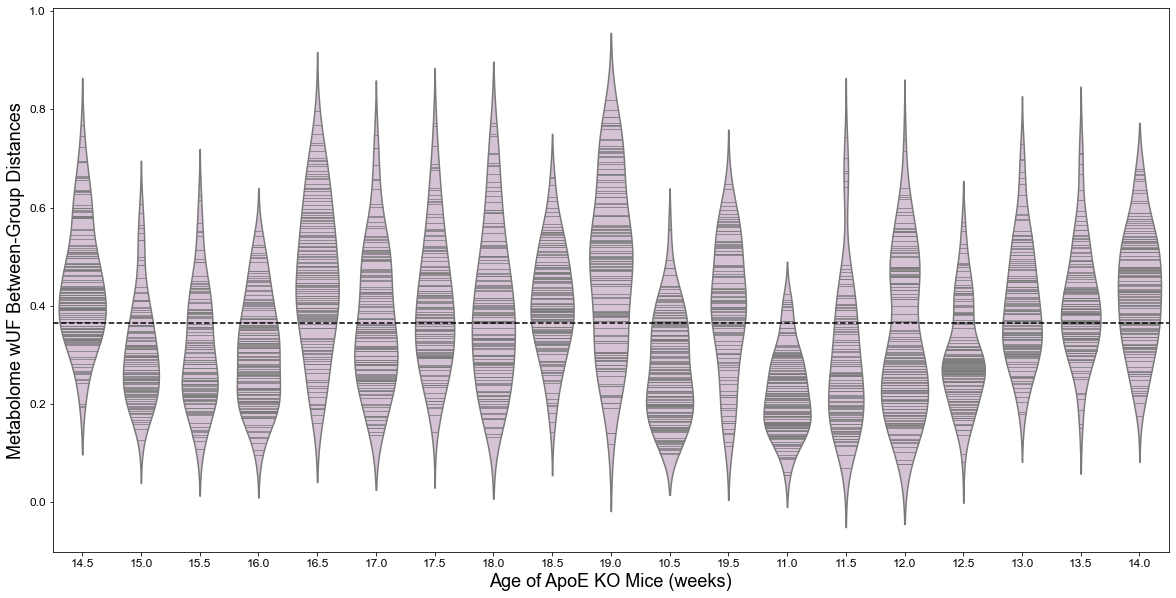

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="host_age", y="Value", data=l_wufdm5,
                    palette=["thistle"], split=True, scale="count", inner="stick", 
                    scale_hue=True, bw='silverman')
    
plt.ylabel('Metabolome wUF Between-Group Distances', size=18)
plt.xlabel('Age of ApoE KO Mice (weeks)', size=18)
plt.xticks(size=12)
plt.yticks(size=12)
ax.axhline(0.3652171642311718, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/longIHC_metab_wUF_dist_boxplot_drop10.svg', dpi=300, bbox_inches="tight")

In [129]:
tt = set(l_wufdm4[l_wufdm4["host_age"] == '12.0'].mice)
ww = set(l_wufdm4[l_wufdm4["host_age"] == '19.5'].mice)

q = list(tt.intersection(ww))
        
long_newdf = l_wufdm4.loc[l_wufdm4['mice'].isin(q)]
        
xxx = long_newdf[long_newdf["host_age"] == '12.0'].Value.values
yyy = long_newdf[long_newdf["host_age"] == '19.5'].Value.values
        
w, p = wilcoxon(xxx, yyy)

print("p-value", p)
print("statistic", w)

p-value 0.00012119891704677848
statistic 1689.0


In [130]:
from scipy.stats import kruskal

z = l_wufdm4[l_wufdm4["host_age"] == '12.0'].Value.values
v = l_wufdm4[l_wufdm4["host_age"] == '19.5'].Value.values

w, p = kruskal(z, v)

print("p-value", p)
print("statistic", w)

p-value 0.00047186302628217174
statistic 12.22369833601715


In [131]:
from scipy.stats import mannwhitneyu

z = l_wufdm4[l_wufdm4["host_age"] == '12.0'].Value.values
v = l_wufdm4[l_wufdm4["host_age"] == '19.5'].Value.values

w, p = mannwhitneyu(z, v)

print("p-value", p)
print("statistic", w)

p-value 0.00047340959055264644
statistic 5774.0


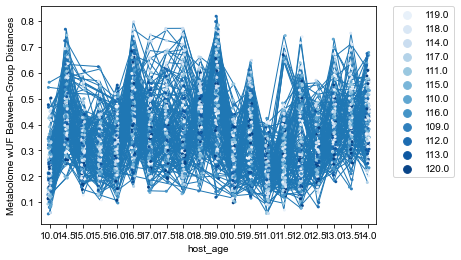

In [133]:
ax = sns.lineplot(x="host_age", y="Value", sort=False,
                  units="mice", lw=1, estimator=None,
                  data=l_wufdm4)
ax = sns.stripplot(x="host_age", y="Value", hue="Controls", 
                   palette='Blues', size=3,
                   data=l_wufdm4)
plt.ylabel('Metabolome wUF Between-Group Distances')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#spaghetti plot